In [29]:
import warnings
warnings.filterwarnings("ignore")

1. importing datasets 
2. merging the datasets

In [30]:

import pandas as pd

df1 = pd.read_csv("D:\\PDS\\Food_Preference.csv")
df2 = pd.read_csv("D:\\PDS\\indian_food.csv")

merged_df = pd.merge(df1, df2, how='outer', left_on='Food', right_on='name')
print("Merged data:")
merged_df.head()

Merged data:


,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adhirasam,"Rice flour, jaggery, ghee, vegetable oil, elachi",vegetarian,10.0,50.0,sweet,dessert,West Bengal,East
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10.0,20.0,spicy,main course,Punjab,North
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5.0,40.0,spicy,main course,Punjab,North
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aloo methi,"Potato, fenugreek leaves, chillies, salt, oil",vegetarian,10.0,40.0,bitter,main course,Punjab,North
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aloo shimla mirch,"Potato, shimla mirch, garam masala, amchur pow...",vegetarian,10.0,40.0,spicy,main course,Punjab,North


1. importing pandas for manipulation of numbers
2. importing matplotlib for plotting
3. importing seaborn for visualisation of graphs
4. using .info() function for all information about dataset like datatype, column name etc
5. using .describe() function for description of dataset
6. using .isnull() function for finding null values in each column (NaN is for dataype object)
7. using .dropna() function for dropping columns with null values
8. using .fillna(value) function for filling null with values
9. using .value_counts() function for counting values in columns
10. uisng .duplicated() function for all duplicated all columns

In [31]:
#importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load the dataset
file_path = "D:\\PDS\\indian_food.csv"
df = pd.read_csv(file_path)

# Basic Data pre-processing
print("Dataset Info:")
df.info()
print("\nDataset Description:")
print(df.describe(include='all'))
print("\nFirst 5 Rows:")
print(df.head())

# Checking for null values
print("\nNull Values in Each Column:")
print(df.isnull().sum())

# Handling Missing Data
# Dropping rows with any missing values
df_cleaned = df.dropna()
print("\nAfter Dropping Nulls:")
print(df_cleaned.isnull().sum())

# Filling missing values with column means (if numeric)
df_filled = df.fillna(df.mean(numeric_only=True))
print("\nDataset after Filling Nulls with Column Means:")
print(df_filled.isnull().sum())

# Value counts for a specific column ('diet' as an example)
print("\nValue Counts for 'diet':")
print(df['diet'].value_counts())

# Checking for Duplicates
print("\nNumber of Duplicated Rows:")
print(df.duplicated().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB

Dataset Description:
              name              ingredients        diet   prep_time  \
count          255                      255         255  255.000000   
unique         255                      252           2         NaN   
top     Balu shahi  Gram flour, ghee, sugar  vegetarian         NaN   
freq             1                       

Scatter plot
using scatter plot to compare prep time an dcooking time in minutes for all dishes 

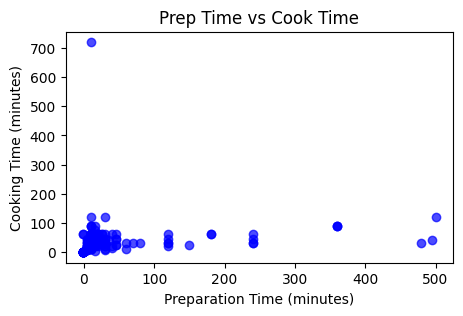

In [32]:
# Scatter Plot
plt.figure(figsize=(5, 3))
plt.scatter(df['prep_time'], df['cook_time'], alpha=0.7, color='b')
plt.title('Prep Time vs Cook Time')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Cooking Time (minutes)')
plt.show()

Bar graph
bar graph is plotted to show number of people eating vegetarian or non-vegetarian

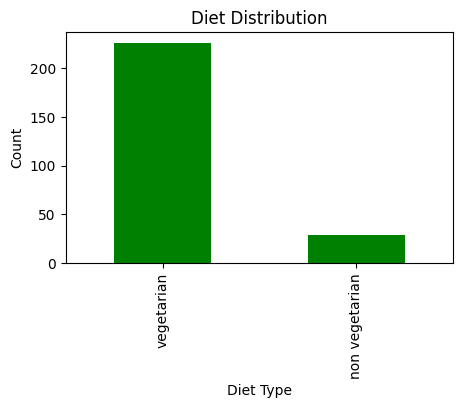

In [33]:
# Bar Plot
plt.figure(figsize=(5, 3))
df['diet'].value_counts().plot(kind='bar', color='green')
plt.title('Diet Distribution')
plt.xlabel('Diet Type')
plt.ylabel('Count')
plt.show()

pie chart
using pie chart for showing percentage of people eating snacks, dessert, starters and main course

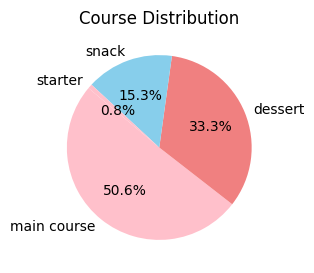

In [34]:
# Pie Chart
plt.figure(figsize=(5, 3))
df['course'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['pink', 'lightcoral', 'skyblue'])
plt.title('Course Distribution')
plt.ylabel('')
plt.show()

Box plot graph for detecting outliers
using box grpah for detecting outliers between prep and cook time

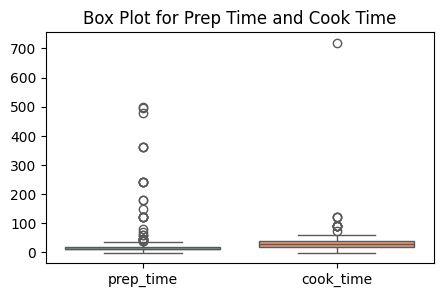

In [35]:
# Box Plot (Outliers)
plt.figure(figsize=(5, 3))
sns.boxplot(data=df[['prep_time', 'cook_time']], palette='Set2')
plt.title('Box Plot for Prep Time and Cook Time')
plt.show()

Wave graph
plotting wave graph to show minutes required for prep and cook time

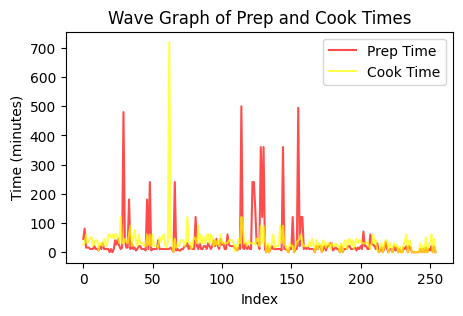

In [36]:
# Wave Graph (Uniform Curve)
plt.figure(figsize=(5, 3))
plt.plot(df['prep_time'], label='Prep Time', color='red', alpha=0.7)
plt.plot(df['cook_time'], label='Cook Time', color='yellow', alpha=0.7)
plt.title('Wave Graph of Prep and Cook Times')
plt.xlabel('Index')
plt.ylabel('Time (minutes)')
plt.legend()
plt.show()

Calculating skewness to see where our data is more relaying prep or cook time. by output we can see the dataset is more heavier towards cook time

In [37]:
# Skewness
print("\nSkewness of Numeric Columns:")
df[['prep_time', 'cook_time']].skew()


Skewness of Numeric Columns:


prep_time     4.636301
cook_time    11.433430
dtype: float64

Detecting outliers using IQR

In [38]:
# Outlier Detection using IQR
Q1 = df[['prep_time', 'cook_time']].quantile(0.25)
Q3 = df[['prep_time', 'cook_time']].quantile(0.75)
IQR = Q3 - Q1
print("\nIQR:")
print(IQR)



IQR:
prep_time    10.0
cook_time    20.0
dtype: float64


Filtering outliers

In [39]:
# Filtering out outliers
outliers = ((df[['prep_time', 'cook_time']] < (Q1 - 1.5 * IQR)) | (df[['prep_time', 'cook_time']] > (Q3 + 1.5 * IQR))).any(axis=1)
print("\nNumber of Outliers:")
print(outliers.sum())


Number of Outliers:
38


Z-score normalisation

In [40]:
# Z-score Normalization
df_normalized = df.copy()
columns_to_normalize = ['prep_time', 'cook_time']
df_normalized[columns_to_normalize] = df[columns_to_normalize].apply(zscore)
print("\nFirst 5 Rows of Normalized Data:")
df_normalized.head()


First 5 Rows of Normalized Data:


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,0.191876,-0.197825,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,0.675221,-0.094028,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,-0.222420,0.528754,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,-0.222420,-0.094028,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,-0.222420,0.113566,sweet,dessert,West Bengal,East


1. import preprocessing module from sklearn 
2. import labelencoder class from sklearn.preprocessing 
3. create an instance of label encoder 
4. apply label encoding to all columns whose datatype is "object" 
5. display the information 

In [43]:


from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

label_encoder = preprocessing.LabelEncoder()

df_normalized['diet'] = label_encoder.fit_transform(df_normalized['diet'])
df_normalized['course'] = label_encoder.fit_transform(df_normalized['course'])
df_normalized['flavor_profile'] = label_encoder.fit_transform(df_normalized['flavor_profile'])
df_normalized['state'] = label_encoder.fit_transform(df_normalized['state'])
df_normalized['region'] = label_encoder.fit_transform(df_normalized['region'])
df_normalized['name'] = label_encoder.fit_transform(df_normalized['name'])
df_normalized['ingredients'] = label_encoder.fit_transform(df_normalized['ingredients'])

df_normalized.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            255 non-null    int64  
 1   ingredients     255 non-null    int64  
 2   diet            255 non-null    int64  
 3   prep_time       255 non-null    float64
 4   cook_time       255 non-null    float64
 5   flavor_profile  255 non-null    int64  
 6   course          255 non-null    int64  
 7   state           255 non-null    int64  
 8   region          255 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 18.1 KB


Training Data Shape:
X_train: (204, 8)
Y_train: (204,)

Testing Data Shape:
X_test: (51, 8)
Y_test: (51,)


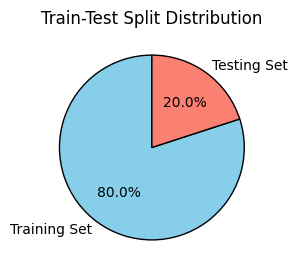

In [46]:
from sklearn.model_selection import train_test_split

x= df_normalized.drop(columns=['diet'])
y= df_normalized['diet']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training Data Shape:")
print("X_train:", x_train.shape)
print("Y_train:", y_train.shape)
print("\nTesting Data Shape:")
print("X_test:", x_test.shape)
print("Y_test:", y_test.shape)

sizes = [len(y_train), len(y_test)]
labels = ['Training Set', 'Testing Set']
colors = ['skyblue', 'salmon']

# Create a pie chart
plt.figure(figsize=(5,3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

# Add title
plt.title('Train-Test Split Distribution')
plt.show()

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Apply Min-Max scaling to the columns that need to be normalized
df_min_max_scaled = df_normalized.copy()
columns_to_scale = ['name', 'diet', 'prep_time', 'cook_time', 'flavor_profile', 'course', 'state', 'region']
df_min_max_scaled[columns_to_scale] = scaler.fit_transform(df_normalized[columns_to_scale])

print("\nFirst 5 Rows of Min-Max Scaled Data:")
df_min_max_scaled.head()


First 5 Rows of Min-Max Scaled Data:


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,0.051181,122,1.0,0.091816,0.036061,1.0,0.0,1.000000,0.285714
1,0.106299,100,1.0,0.161677,0.042996,1.0,0.0,0.750000,0.857143
2,0.279528,35,1.0,0.031936,0.084605,1.0,0.0,0.708333,0.428571
3,0.299213,95,1.0,0.031936,0.042996,1.0,0.0,0.750000,0.857143
4,0.314961,129,1.0,0.031936,0.056865,1.0,0.0,1.000000,0.285714
